In [1]:
from typing import Any, Dict, Iterable, List, Literal, Optional, Tuple, Union
import mlx.core as mx
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from mlx_graphs.sampler.neighbor_sampler import sample_nodes
from mlx_graphs.loaders.neighbor_loader import NeighborLoader
from mlx_graphs.data import GraphData


def to_networkx(
    data: GraphData,
    remove_self_loops: bool = False,
    to_undirected: Optional[Union[bool, str]] = False,
    to_multi: bool = False,
) -> Any:
    r"""Converts a :class:`mlx_graphs.data.GraphData` instance to a
    :obj:`networkx.Graph` if :attr:`to_undirected` is set to :obj:`True`, or
    a directed :obj:`networkx.DiGraph` otherwise.

    Args:
        data (mlx_graphs.data.GraphData or torch_geometric.data.HeteroData): A graph data object.
        remove_self_loops (bool, optional): If set to :obj:`True`, will not
            include self-loops in the resulting graph. (default: :obj:`False`)

    Examples:
        >>> edge_index = mx.array([
        ...     [0, 1, 1, 2, 2, 3],
        ...     [1, 0, 2, 1, 3, 2],
        ... ])
        >>> data = GraphData(edge_index=edge_index, num_nodes=4)
        >>> to_networkx(data)
        <networkx.classes.digraph.DiGraph at 0x2713fdb40d0>

    """
    import networkx as nx


    if to_undirected:
        G = nx.MultiGraph() if to_multi else nx.Graph()
    else:
        G = nx.MultiDiGraph() if to_multi else nx.DiGraph()

    def to_networkx_value(value: Any) -> Any:
        return value.tolist() if isinstance(value, mx.array) else value

    for i, _ in enumerate(data.node_features):

        G.add_node(i)

    for v,w in data.edge_index.T.tolist():
        if remove_self_loops and v == w :
            continue

        G.add_edge(v, w)

    return G


def draw_graph_from_edge_index(edge_index):
    edge_list = list(map(tuple, edge_index.T))
    G = nx.DiGraph()
    G.add_edges_from(edge_list)
    nx.draw(G, with_labels=True)
    plt.show()
    

In [2]:
edge_index = mx.array([
    [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],  
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3,]   
])
edge_index_numpy = np.array([
    [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],  
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3,]   
])
                    
node_features = mx.array([[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]])
data = GraphData(node_features=node_features, edge_index=edge_index)

G = to_networkx(data=data)
G.number_of_nodes()

13

In [3]:
def draw_graph_from_edge_index(edge_index):
    edge_list = list(map(tuple, edge_index.T))
    G = nx.DiGraph()
    G.add_edges_from(edge_list)
    nx.draw(G, with_labels=True)
    plt.show()
    

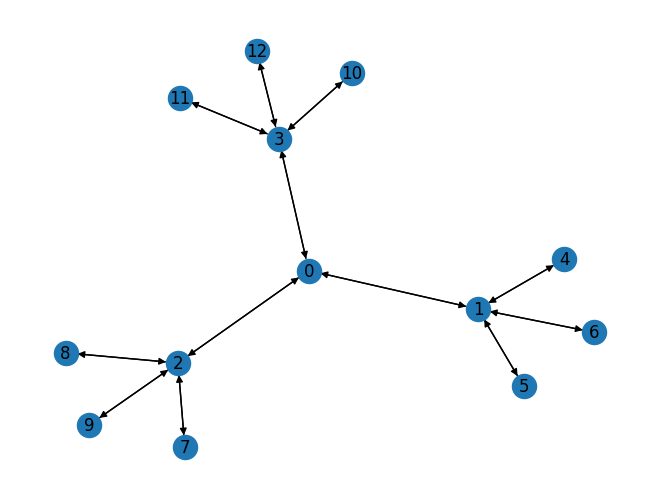

In [4]:
draw_graph_from_edge_index(edge_index=edge_index_numpy)

In [5]:
sample_nodes(edge_index=edge_index_numpy, num_neighbors=[2], batch_size=1, input_nodes=np.array([0]))

(array([[0, 0],
        [2, 3]]),
 array([0, 2, 3]),
 array([1, 2]),
 array([0]))

In [6]:
sample_nodes(edge_index=edge_index_numpy, num_neighbors=[2,2], batch_size=1, input_nodes=np.array([0]))

(array([[ 0,  0,  2,  2,  3,  3],
        [ 3,  2,  8,  9, 11, 10]]),
 array([ 0,  2,  3,  8,  9, 10, 11]),
 array([ 2,  1,  7,  8, 10,  9]),
 array([0]))

In [7]:
edge_index_numpy

array([[ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  1,  2,  3,  4,
         5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  0,  0,  1,
         1,  1,  2,  2,  2,  3,  3,  3]])

NeighborLoader

In [8]:
loader = NeighborLoader(graph_data=data, batch_size=1, num_neighbors=[2,2])

In [9]:
g = next(iter(loader))

In [11]:
g

GraphData(
	edge_index(shape=(2, 2), int64)
	node_features(shape=(3, 1), int32)
	n_id(shape=(3,), int32)
	e_id(shape=(2,), int64)
	input_nodes(shape=(1,), int32))

In [10]:
type(g.n_id)

mlx.core.array